In [1]:
# We are going to build an image classifier using the sequential API
# To begin we are going to download the Fashion MNIST dataset

# Import the Fashion MNIST dataset loader from TensorFlow Keras
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset and split it into training and test sets
# X_train_full and y_train_full contain the training images and labels
# X_test and y_test contain the test images and labels
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Print the shape of the full training dataset
# Should output (60000, 28, 28) → 60,000 images of 28x28 pixels
print(f"The shape of the dataset is:\n{X_train_full.shape}")

# Print the data type of the training images (usually uint8)
print(f"The data type of the dataset is:\n{X_train_full.dtype}")


The shape of the dataset is:
(60000, 28, 28)
The data type of the dataset is:
uint8


In [2]:
# We are going to download the dataset into the folder to use it locally
import numpy as np

# Save the arrays to a compressed .npz file
np.savez_compressed("fashion_mnist_data.npz",
                    X_train_full=X_train_full,
                    y_train_full=y_train_full,
                    X_test=X_test,
                    y_test=y_test)

print("Dataset saved as 'fashion_mnist_data.npz' in the current directory.")

Dataset saved as 'fashion_mnist_data.npz' in the current directory.


In [2]:
import numpy as np

# To load the saved file we implement the following code
data = np.load("fashion_mnist_data.npz")
X_train_full = data["X_train_full"]
y_train_full = data["y_train_full"]
X_test = data["X_test"]
y_test = data["y_test"]

print(f"Loaded shapes: {X_train_full.shape}, {X_test.shape}")

Loaded shapes: (60000, 28, 28), (10000, 28, 28)


In [3]:
# Note that the dataset is already split into a training set and a test set
# but it does not have a validation set, so we are going to create one
# Since we are going to train the neural network using Gradient Descent,
# we must scale the input features
# For simplicity, we'll scale the pixel intensities down to the 0-1 range 
# by dividing them by 255.0 (this also converts them to float)

# Normalize the pixel values by dividing by 255.0 (so values range from 0 to 1)
# and split the first 5,000 samples from the full training set to use as a validation set.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

# Split the corresponding labels for validation and training sets
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalize the test set pixel values as well
X_test = X_test / 255.0

In [4]:
# For Fashion MNIST we need the list of class names to know we are dealing with
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# For example, the first image in the training set represents a coat
print(f"What type of cloth is the first element in the traning set? --> {class_names[y_train[0]]}")

What type of cloth is the first element in the traning set? --> Coat


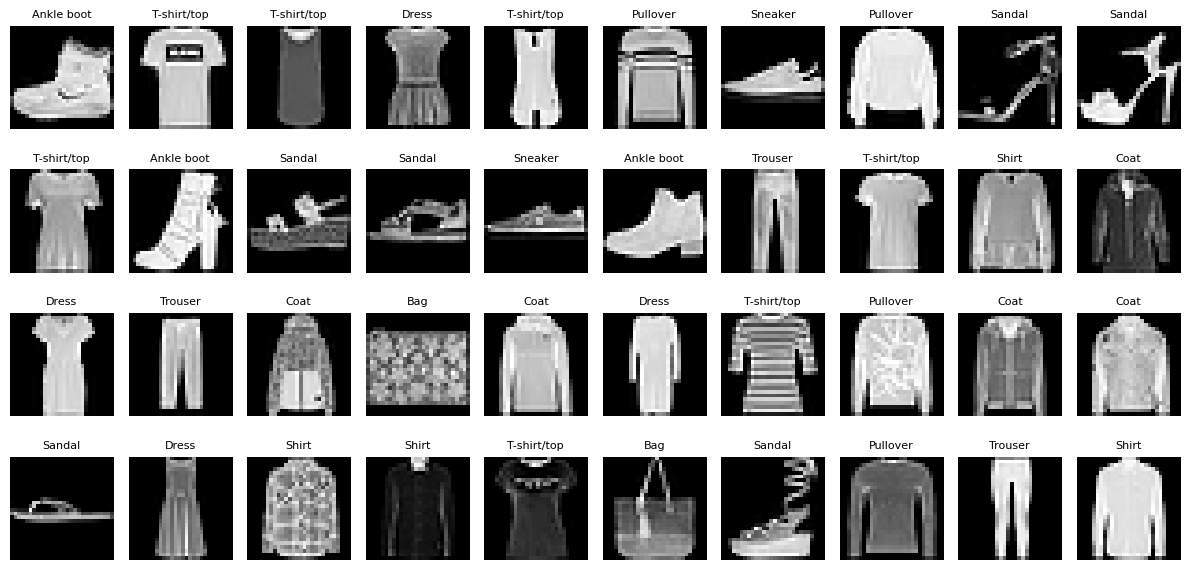

In [5]:
# Let's plot same images from the dataset
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 6))
for i in range(40):
    plt.subplot(4, 10, i + 1)  # 4 rows, 10 columns
    plt.imshow(X_train_full[i], cmap='gray')  # Show grayscale image
    plt.axis('off')  # Hide axes
    plt.title(class_names[y_train_full[i]], fontsize=8)

plt.tight_layout()
plt.show()

In [6]:
# Next step is to create a neural network
# We are going to build a classification MLP with 2 hidden layers

from tensorflow import keras

# Create a Sequential model — a linear stack of layers
model = keras.models.Sequential()

# Add an explicit input layer specifying the shape of the input data (28x28 grayscale images)
model.add(keras.layers.InputLayer(shape=[28, 28]))

# Flatten the 2D input (28x28) into a 1D vector (784) to feed into the dense layers
model.add(keras.layers.Flatten())

# First hidden layer: Dense layer with 300 neurons and ReLU activation
model.add(keras.layers.Dense(300, activation="relu"))

# Second hidden layer: Dense layer with 100 neurons and ReLU activation
model.add(keras.layers.Dense(100, activation="relu"))

# Output layer: Dense layer with 10 neurons (one for each class) and softmax activation
# Softmax outputs probabilities that sum to 1, suitable for multi-class classification
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
# Another way of creating a model by passing a list of layers
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
# We can determine the model's parameters using the method summary:
# - Layer names and types
# - Output shapes per layer
# - Number of trainable parameters
# - Total/trainable/non-trainable parameter counts
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# We can determine the amount of layers of the model
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [10]:
# We can also determine the name of each layer
hidden1 = model.layers[1]
print(f"The name of the first hidden layer is {hidden1.name}")

The name of the first hidden layer is dense_3


In [11]:
# And we can also verify if a paricular name belongs to a layer
model.get_layer("dense_3") is hidden1

True

In [12]:
# All the parameters of a layer can be accessed using its get_weights()
# and set_weights() methods. For a Dense layer, this includes both
# the connection weights and the bias terms

# Retrieve the weights and biases from the 'hidden1' layer
weights, biases = hidden1.get_weights()

# Print the actual weight matrix (connections between neurons)
print(f"The weights are:\n{weights}\n")

# Print the dimensions of the weight matrix (input features x units in this layer)
print(f"The weights dimensions are: {weights.shape}\n")

# Print the bias terms (one for each neuron in the layer)
print(f"The biases of the layer are:\n{biases}\n")

# Print the dimensions of the bias vector (should match the number of units in the layer)
print(f"The biases dimensions are: {biases.shape}\n")


The weights are:
[[-0.02868037 -0.06782652 -0.04641917 ...  0.01437759  0.00788121
   0.02151834]
 [ 0.00872892  0.02135859  0.01967071 ...  0.04307842 -0.01983855
  -0.07384815]
 [ 0.06655057 -0.06573629 -0.01061224 ...  0.05705689  0.0070889
  -0.00356918]
 ...
 [-0.06692991  0.0266254  -0.00653709 ...  0.0300881   0.02262281
   0.00981247]
 [-0.01041725 -0.05177004  0.05854034 ... -0.02525941 -0.00645857
  -0.0461462 ]
 [ 0.03284481 -0.05406872  0.04309067 ... -0.07043938 -0.07320458
  -0.01100205]]

The weights dimensions are: (784, 300)

The biases of the layer are:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
# After a model is created, you must call its compile() method to
# specify the loss function and the optimizer to use
# You can also specify a list of extra metrics to compute during training and evaluation

# Compile the model with the desired settings before training
model.compile(
    # Loss function for multi-class classification with sparese labels (0–9) and exclusive classes
    # If we had one target probability per class for each instance, then we would use categorical_crossentropy
    # If we had binary and multilabel binary classification, then we would use the sigmoid activation function
    # and binary_crossentropy as loss function
    loss="sparse_categorical_crossentropy",
    # Optimizer: Stochastic Gradient Descent (basic but effective for small tasks) for backpropagation training
    # The default learning rate is lr=0.01
    optimizer="sgd",
    # Metric to evaluate during training and testing (percentage of correct predictions)
    metrics=["accuracy"]
)

# Train the model on the training data for 30 epochs
# Also evaluate its performance on the validation set after each epoch
history = model.fit(
    X_train, y_train,               # Training data and labels
    epochs=30,                      # Number of times the model sees the entire training dataset
    validation_data=(X_valid, y_valid)  # Validation data used to monitor overfitting during training
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6953 - loss: 0.9728 - val_accuracy: 0.8198 - val_loss: 0.5172
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8326 - loss: 0.4859 - val_accuracy: 0.8494 - val_loss: 0.4434
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8436 - loss: 0.4471 - val_accuracy: 0.8642 - val_loss: 0.4008
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8567 - loss: 0.4130 - val_accuracy: 0.8624 - val_loss: 0.4021
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8633 - loss: 0.3894 - val_accuracy: 0.8696 - val_loss: 0.3804
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8656 - loss: 0.3754 - val_accuracy: 0.8674 - val_loss: 0.3795
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8703 - loss: 0.3616 - val_accuracy: 0.8764 - val_loss: 0.3641
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8757 - loss: 0.3471 - 

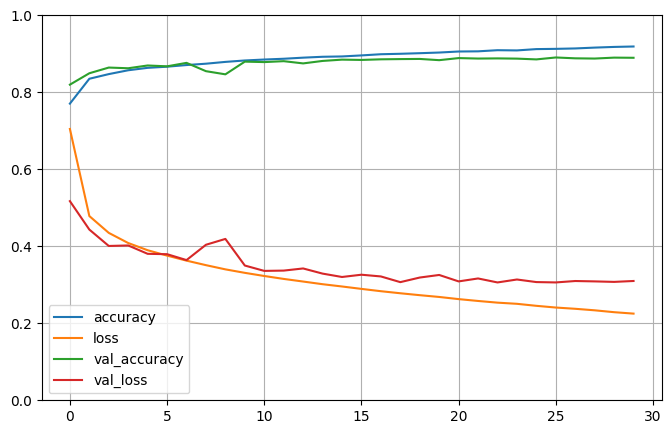

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
# Let's now test this model on the training set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8813 - loss: 0.3391


[0.3387540876865387, 0.8810999989509583]